<a href="https://colab.research.google.com/github/harukamasatsugu/best_portfolio/blob/main/%E3%83%9D%E3%83%BC%E3%83%88%E3%83%95%E3%82%A9%E3%83%AA%E3%82%AA%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers_map = {
    'トヨタ': '7203.T',
    'ソニー': '6758.T',
    'ソフトバンクG': '9984.T',
    '三菱UFJ': '8306.T',
    'NTT': '9432.T'
}
tickers = list(tickers_map.values())

# --- 1. データの取得 ---
try:
    print("過去1年間の株価データをyfinanceから取得中...")
    # auto_adjust=True がデフォルトのため、Adj Close は含まれませんが、
    # Close が調整済みになります。
    data = yf.download(tickers, period='1y')

    # 調整済みの 'Close' (終値) を使用
    close_prices = data['Close']

    # カラム名を見やすいように企業名に置き換え
    close_prices.rename(columns={v: k for k, v in tickers_map.items()}, inplace=True)

    # --- 2. 日次対数リターン (Daily Log Returns) の計算 ---
    daily_log_returns = np.log(close_prices / close_prices.shift(1))

    # 最初の行（リターンが計算できない日）を削除
    returns_df = daily_log_returns.dropna()

    # --- 3. 結果の表示と保存 ---
    print("\n--- 日次対数リターン (Daily Log Returns) の最初の5行 ---")
    print(returns_df.head())

    print("\n--- 日次リターンの基本統計情報 ---")
    print(returns_df.describe())

    csv_file = "stock_returns_fixed.csv"
    returns_df.to_csv(csv_file)
    print(f"\nリターンデータは '{csv_file}' に保存されました。")

except Exception as e:
    print(f"\nデータの取得または処理中にエラーが発生しました。")
    print(f"エラー内容: {e}")

/tmp/ipython-input-1243629977.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1y')
[                       0%                       ]

過去1年間の株価データをyfinanceから取得中...


[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-1243629977.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.rename(columns={v: k for k, v in tickers_map.items()}, inplace=True)



--- 日次対数リターン (Daily Log Returns) の最初の5行 ---
Ticker           ソニー       トヨタ     三菱UFJ       NTT   ソフトバンクG
Date                                                        
2024-11-01 -0.018155 -0.025294 -0.004925 -0.002033 -0.057865
2024-11-05  0.019990  0.008945  0.001542 -0.002717 -0.002010
2024-11-06  0.016719  0.017095  0.055428 -0.002043  0.050035
2024-11-07 -0.000902  0.028460  0.029579  0.030214 -0.019650
2024-11-08  0.012013 -0.036689  0.000849  0.001322  0.015708

--- 日次リターンの基本統計情報 ---
Ticker         ソニー         トヨタ       三菱UFJ         NTT     ソフトバンクG
count   244.000000  244.000000  244.000000  244.000000  244.000000
mean      0.001925    0.000778    0.001602    0.000427    0.004308
std       0.024525    0.021627    0.021588    0.010286    0.034205
min      -0.105859   -0.060352   -0.109464   -0.036753   -0.131644
25%      -0.013781   -0.011728   -0.007602   -0.005823   -0.013238
50%      -0.000226    0.000099    0.001412   -0.000629    0.004170
75%       0.013256    0.012453    0.

過去 5y の株価データを取得中...


/tmp/ipython-input-2066848242.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=PERIOD)
[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-2066848242.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.rename(columns={v: k for k, v in tickers_map.items()}, inplace=True)


モンテカルロ・シミュレーションを実行中... (ポートフォリオ数: 50000)

🏆 最大シャープレシオ・ポートフォリオ
年率リターン: 28.04 %
年率ボラティリティ（リスク）: 20.91 %
シャープレシオ: 1.3410

--- 銘柄の重み ---
トヨタ         1.49%
ソニー         0.44%
ソフトバンクG    51.13%
三菱UFJ      40.11%
NTT         6.82%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

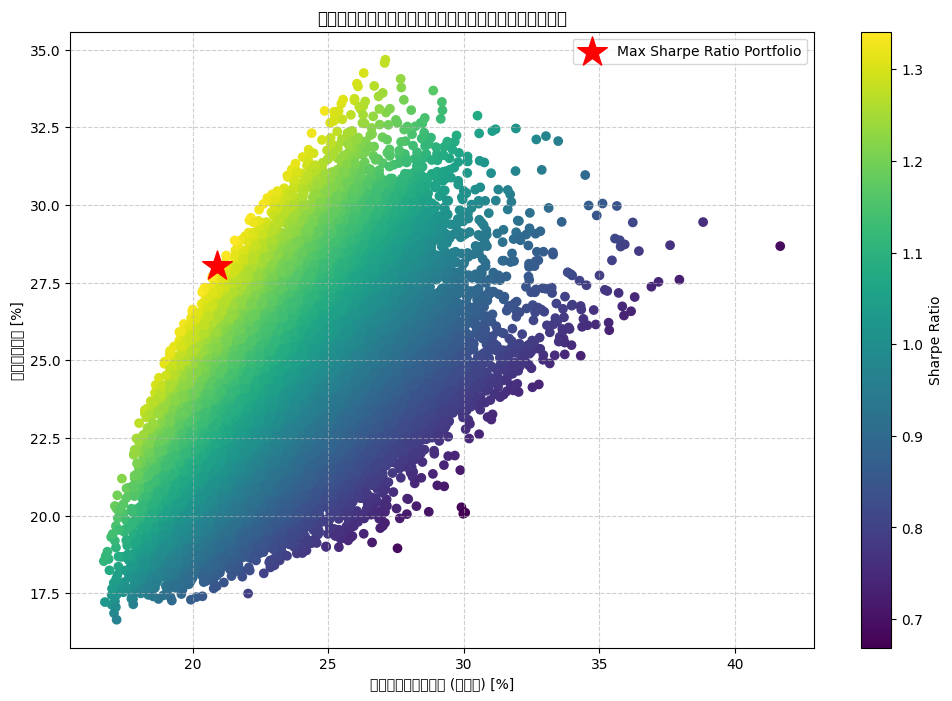

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 銘柄設定
tickers_map = {
    'トヨタ': '7203.T',
    'ソニー': '6758.T',
    'ソフトバンクG': '9984.T',
    '三菱UFJ': '8306.T',
    'NTT': '9432.T'
}
tickers = list(tickers_map.values())
num_assets = len(tickers)

# 定数設定
NUM_PORTFOLIOS = 50000  # 生成するポートフォリオの数
RISK_FREE_RATE = 0.00   # 無リスク金利 (Sharpe比計算用)
TRADING_DAYS = 250      # 年間の営業日数
PERIOD = '5y'           # 過去5年間のデータを使用

def get_portfolio_analysis():
    print(f"過去 {PERIOD} の株価データを取得中...")
    try:
        data = yf.download(tickers, period=PERIOD)
        close_prices = data['Close']

        close_prices.rename(columns={v: k for k, v in tickers_map.items()}, inplace=True)

    except Exception as e:
        print(f"データの取得に失敗しました: {e}")
        return

    # --- 1. 年率リターンと共分散行列の計算 ---
    daily_log_returns = np.log(close_prices / close_prices.shift(1)).dropna()
    annual_returns = daily_log_returns.mean() * TRADING_DAYS
    annual_cov_matrix = daily_log_returns.cov() * TRADING_DAYS

    # --- 2. モンテカルロ・シミュレーションの実行 ---
    # ★★★ 修正箇所: 3 + num_assets に変更 ★★★
    # results配列の行数: リターン(1) + リスク(1) + Sharpe比(1) + 重み(5) = 8
    results = np.zeros((3 + num_assets, NUM_PORTFOLIOS))

    print(f"モンテカルロ・シミュレーションを実行中... (ポートフォリオ数: {NUM_PORTFOLIOS})")
    for i in range(NUM_PORTFOLIOS):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        portfolio_return = np.sum(annual_returns * weights) * 100
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights))) * 100
        sharpe_ratio = (portfolio_return / 100 - RISK_FREE_RATE) / (portfolio_stddev / 100)

        # 結果を格納
        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = sharpe_ratio

        # 重みを格納
        for j in range(num_assets):
            results[j+3, i] = weights[j]

    # --- 3. 最適ポートフォリオの特定 ---
    # DataFrameのカラム名は ['Return', 'Risk', 'Sharpe Ratio'] (3つ) + 銘柄名 (5つ) = 8
    results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio'] + list(tickers_map.keys()))

    max_sharpe_portfolio = results_df.loc[results_df['Sharpe Ratio'].idxmax()]

    # --- 4. 結果の表示 ---
    print("\n" + "="*50)
    print("🏆 最大シャープレシオ・ポートフォリオ")
    print("="*50)
    print(f"年率リターン: {max_sharpe_portfolio['Return']:.2f} %")
    print(f"年率ボラティリティ（リスク）: {max_sharpe_portfolio['Risk']:.2f} %")
    print(f"シャープレシオ: {max_sharpe_portfolio['Sharpe Ratio']:.4f}")
    print("\n--- 銘柄の重み ---")

    weights_output = max_sharpe_portfolio[list(tickers_map.keys())] * 100
    print(weights_output.map('{:.2f}%'.format).to_string())

    # --- 5. 効率的フロンティアのプロット ---
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(results_df['Risk'], results_df['Return'],
                          c=results_df['Sharpe Ratio'],
                          cmap='viridis', marker='o')

    plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'],
                marker='*', color='r', s=500, label='Max Sharpe Ratio Portfolio')

    plt.title('効率的フロンティアとモンテカルロ・シミュレーション')
    plt.xlabel('年率ボラティリティ (リスク) [%]')
    plt.ylabel('年率リターン [%]')
    plt.colorbar(scatter, label='Sharpe Ratio')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(labelspacing=0.8)
    plt.show()

if __name__ == "__main__":
    get_portfolio_analysis()